# 1st Project : Neural Network for Handwritten Digits Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [2]:
# Load HandWritten datasets from kers library

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

4


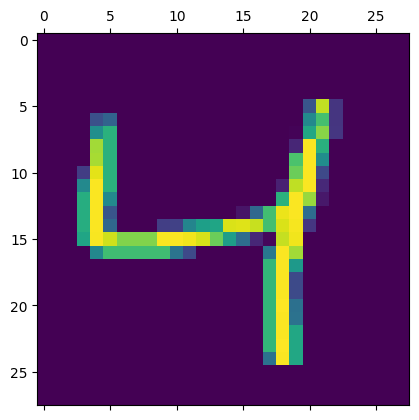

In [3]:
# Visualize digit 
plt.matshow(X_train[2])
print(y_train[2])

Firstly we need to flatten our dataset for the first neuron layer

In [4]:
#Scaling the values. Scaling increased accuracy from 0.8848 to 9281
X_train = X_train/255
X_test = X_test/255

X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
print(X_train_flatten.shape )
print(X_test_flatten.shape )
# Shape (60000, 784) : means that we have 60000 samples with 784 elements each one (pixels)


(60000, 784)
(10000, 784)


We are going to work firstly without a hidden layer, so we have only 2 layers 

In [5]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid' )
] ) # Sequential means the layers are stack. And with the Dense attribute we say that each neurnon from the first layers is connected with everyone from the second layer

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train_flatten, y_train, epochs = 5 ) # Train the model 

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8111 - loss: 0.7274
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.3094
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9205 - loss: 0.2837
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9256 - loss: 0.2658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9234 - loss: 0.2753


In [6]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9149 - loss: 0.3068


[0.2697327435016632, 0.9262999892234802]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7

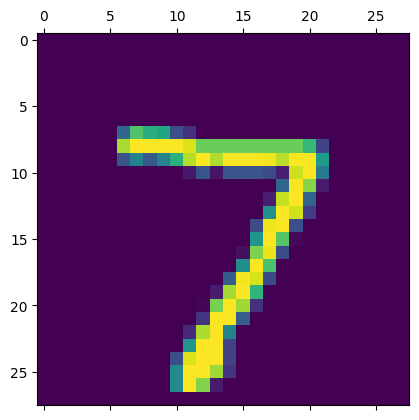

In [7]:
plt.matshow(X_test[0])
y_predicted = model.predict(X_test_flatten)
np.argmax(y_predicted[0]) # Printing index of maximum value

In [8]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

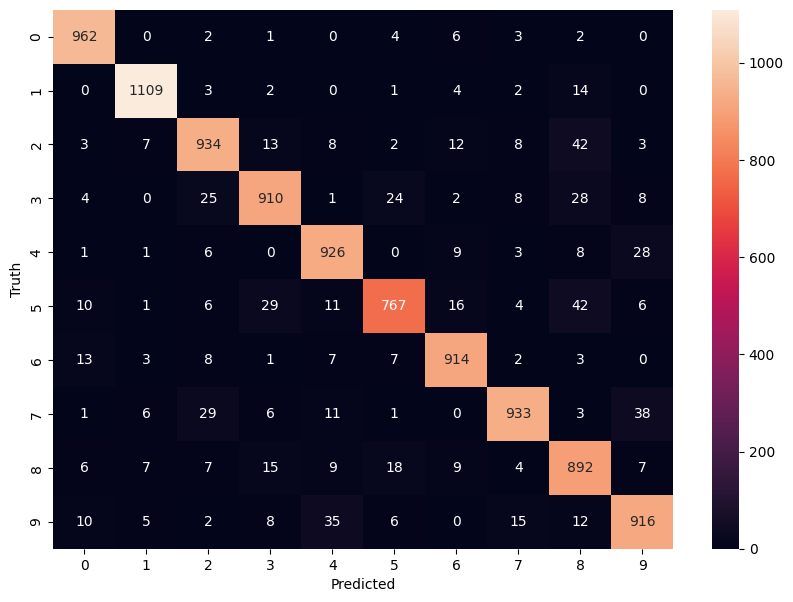

In [9]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')# The following plot gives us a representation on the times the model had real = prediction (diagonal) and the times it was wrong. 

Proceeding with adding more layers to the model 

In [10]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu' ),
    keras.layers.Dense(10, activation = 'sigmoid' )
] ) # Sequential means the layers are stack. And with the Dense attribute we say that each neurnon from the first layers is connected with everyone from the second layer

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train_flatten, y_train, epochs = 5 ) # Train the model 

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8747 - loss: 0.4452
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9616 - loss: 0.1304
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9739 - loss: 0.0870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9809 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0468


In [11]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9708 - loss: 0.1026


[0.08593959361314774, 0.9746999740600586]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

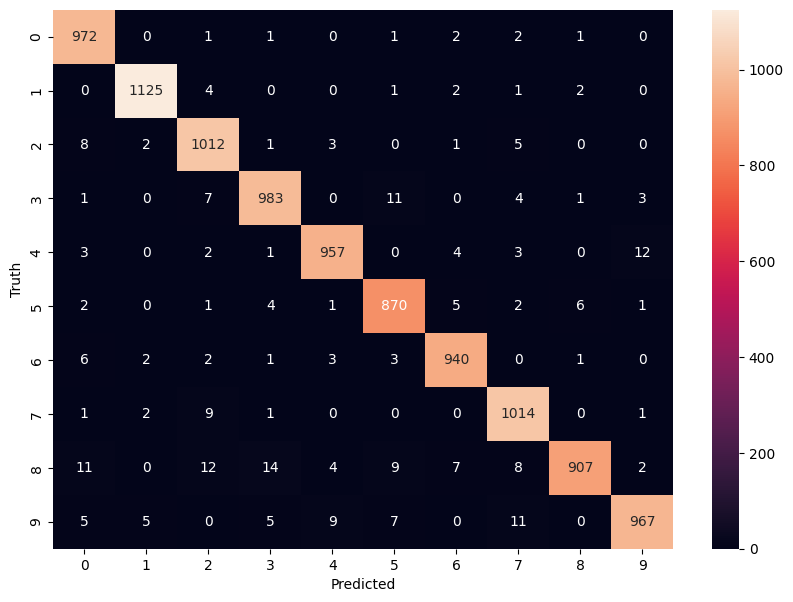

In [12]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In order to avoide flattening every time our data, we can add one more layer to the model with the same dimensions as our inputs. IN our case this means adding a layer with shape (28,28) (matrix dimensions for each digit)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100 ,activation = 'relu' ),
    keras.layers.Dense(10, activation = 'relu' )
] ) # Sequential means the layers are stack. And with the Dense attribute we say that each neurnon from the first layers is connected with everyone from the second layer

model.compile(optimizer = 'SGD', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs = 5 ) # Train the model
model.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0958 - loss: 2.6114
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0990 - loss: 2.2851
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0997 - loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0995 - loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.0970 - loss: 2.3026
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0921 - loss: 2.3026


[2.30259108543396, 0.0957999974489212]

# Loss function

- It is a metric for NN training 
- Los is called each individual error and the total of that (let's say MSE) is the cost function
- epochs : epoch = 1 means go through all the training samples once. 
- Log loss or binary cross entropy ('binary_crossentropy') : Mostly used for logistic regression. It is a classification cost function. 

# **Working With TensorBoard**

It's an easy GUI to visualize your model statistics and your results. 

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100 ,activation = 'relu' ),
    keras.layers.Dense(10, activation = 'relu' )
] ) # Sequential means the layers are stack. And with the Dense attribute we say that each neurnon from the first layers is connected with everyone from the second layer

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)

model.compile(optimizer = 'SGD', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs = 5, callbacks = [tb_callback])
# Adding the callback to the fir method, provides all the info (loss, accuracy etc.) into the tensorBoard for postprocessing
model.evaluate(X_test, y_test)

c:\Users\Altair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1308 - loss: 5.4214
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0974 - loss: 8.1716
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0967 - loss: 8.1965
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1001 - loss: 8.2219
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0999 - loss: 8.1810
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0921 - loss: 8.3305


[8.212608337402344, 0.0957999974489212]

In [ ]:
# lunch TesnorBoard interface
%load_ext tensorboard
%tensorboard --logdir logs/fit